In [1]:
import os
from pytube import YouTube
from moviepy.editor import *

In [2]:
import os
import speech_recognition as sr
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [4]:
def extract_audio_from_youtube(video_url, output_path):
    try:
        # Download the YouTube video
        yt = YouTube(video_url)
        video_stream = yt.streams.filter(only_audio=True).first()
        video_stream.download(output_path)

        # Extract audio from the downloaded video
        video_path = os.path.join(output_path, video_stream.default_filename)
        audio_clip = AudioFileClip(video_path)
        audio_clip.write_audiofile(output_path + "/youtubewav3.wav", codec="pcm_s16le")
        audio_clip.close()

        # Remove the downloaded video
        os.remove(video_path)
        print("Audio extracted successfully and saved as youtube_wav.wav")
    except Exception as e:
        print("Error:", str(e))

In [19]:
if __name__ == "__main__":
    video_url = "https://www.youtube.com/watch?v=2H8r1loNf2o&t=12s&pp=ygURMzAgbWludXRlIGxlY3R1cmU%3D"
    output_folder = r"C:\Users\pooja\OneDrive\Desktop\audi1"

    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    extract_audio_from_youtube(video_url, output_folder)

MoviePy - Writing audio in C:\Users\pooja\OneDrive\Desktop\audi1/youtubewav3.wav


MoviePy - Done.
Audio extracted successfully and saved as youtube_wav.wav


In [20]:
import os
import speech_recognition as sr
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [21]:
# Create a speech recognition object
r = sr.Recognizer()

In [22]:
def format_time(milliseconds):
    """Convert milliseconds to hours:minutes:seconds format"""
    seconds = milliseconds // 1000
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    return f"{hours:02}:{minutes:02}:{seconds:02}"

In [23]:
def transcribe_large_audio(path):
    """Split audio into chunks and apply speech recognition"""
    # Open audio file with pydub
    sound = AudioSegment.from_wav(path)
    # Split audio where silence is 700ms or greater and get chunks
    chunks = split_on_silence(sound, min_silence_len=700, silence_thresh=sound.dBFS-14, keep_silence=700, seek_step=1)

    # Create folder to store audio chunks
    folder_name = "audio-chunks"
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)

    whole_text = ""
    start_time = 0  # Track starting time for each chunk
    # Process each chunk
    for i, audio_chunk in enumerate(chunks, start=1):
        # Export chunk and save in folder
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # Recognize chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # Convert to text
            try:
                text = r.recognize_google(audio_listened)
            except sr.UnknownValueError as e:
                print("Error:", str(e))
            else:
                text = f"{text.capitalize()}"
                start_time_str = format_time(start_time)
                end_time_str = format_time(start_time + len(audio_chunk))
                print(f"{chunk_filename} {start_time_str} - {end_time_str}: ", text)
                whole_text += f"{start_time_str} - {end_time_str},{text}\n"
        start_time += len(audio_chunk)

    # Return text for all chunks
    return whole_text

In [24]:
path3 = r"C:\Users\pooja\OneDrive\Desktop\audi1/youtubewav3.wav"
result = transcribe_large_audio(path3)
print(result)

audio-chunks\chunk1.wav 00:00:00 - 00:00:02:  Anuja
audio-chunks\chunk2.wav 00:00:02 - 00:00:04:  Can you broken
Error: 
audio-chunks\chunk4.wav 00:00:08 - 00:00:12:  Why you are come to the end of yourself
audio-chunks\chunk5.wav 00:00:12 - 00:00:17:  This means one thing
Error: 
Error: 
audio-chunks\chunk8.wav 00:00:39 - 00:00:44:  Kerala
audio-chunks\chunk9.wav 00:00:44 - 00:00:46:  Lucknow image
Error: 
audio-chunks\chunk11.wav 00:00:48 - 00:01:51:  This automatically lotion speech
Error: 
audio-chunks\chunk13.wav 00:02:35 - 00:03:07:  Angreji america
audio-chunks\chunk14.wav 00:03:07 - 00:03:18:  Slip disc switch from weakness to win a from hoarding to conquering from losing to champion
Error: 
audio-chunks\chunk16.wav 00:04:54 - 00:07:05:  Recovery this weekend up those things again again
audio-chunks\chunk17.wav 00:07:05 - 00:08:15:  That enjoys so even if you are a stollar you have to keep it to yourself you have the fastest so the reason why you want 20 is equal to there is no

In [25]:
# Save the result to the specified text file
transcription_result = r"C:\Users\pooja\OneDrive\Desktop\text\text.txt"
with open(transcription_result, 'w') as file:
    file.write(result)

In [26]:
#text extracted

In [27]:
result

"00:00:00 - 00:00:02,Anuja\n00:00:02 - 00:00:04,Can you broken\n00:00:08 - 00:00:12,Why you are come to the end of yourself\n00:00:12 - 00:00:17,This means one thing\n00:00:39 - 00:00:44,Kerala\n00:00:44 - 00:00:46,Lucknow image\n00:00:48 - 00:01:51,This automatically lotion speech\n00:02:35 - 00:03:07,Angreji america\n00:03:07 - 00:03:18,Slip disc switch from weakness to win a from hoarding to conquering from losing to champion\n00:04:54 - 00:07:05,Recovery this weekend up those things again again\n00:07:05 - 00:08:15,That enjoys so even if you are a stollar you have to keep it to yourself you have the fastest so the reason why you want 20 is equal to there is nothing right now request\n00:08:15 - 00:08:21,Hayabusa where is you want to eat\n00:08:21 - 00:08:39,When you want to sexy as bad as water i said when you want to sexy as bad as you want to play when you be successful\n00:08:39 - 00:08:44,Winston churchill set the destiny of man is not measured by material competition\n00:08:44

In [28]:
#preprocessing

In [29]:
from gensim import corpora # Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.
from gensim.models import LsiModel
from gensim.parsing.preprocessing import preprocess_string
import re


In [30]:
def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    x = re.sub(pattern, '', x)
    return x

In [31]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '', x)
        x = re.sub('[0-9]{4}', '', x)
        x = re.sub('[0-9]{3}', '', x)
        x = re.sub('[0-9]{2}', '', x)
        x = re.sub('\n', '', x)
    return x

In [32]:
def clean(x):
    x = clean_text(x)
    x = clean_numbers(x)
    return x

In [35]:
text = clean(result)

In [36]:
text

'  Anuja  Can you broken  Why you are come to the end of yourself  This means one thing  Kerala  Lucknow image  This automatically lotion speech  Angreji america  Slip disc switch from weakness to win a from hoarding to conquering from losing to champion  Recovery this weekend up those things again again  That enjoys so even if you are a stollar you have to keep it to yourself you have the fastest so the reason why you want  is equal to there is nothing right now request  Hayabusa where is you want to eat  When you want to sexy as bad as water i said when you want to sexy as bad as you want to play when you be successful  Winston churchill set the destiny of man is not measured by material competition  Which weather will i get an app still you and i have a branded go with destin  It is about becoming a master of your own test as you understanding and perception of life you will see everything  Find se kuch faces of your mind move toward that destiny with patients  Tik tok what is stick

In [38]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [39]:
# Tokenization
tokens = word_tokenize(text)
tokens

['Anuja',
 'Can',
 'you',
 'broken',
 'Why',
 'you',
 'are',
 'come',
 'to',
 'the',
 'end',
 'of',
 'yourself',
 'This',
 'means',
 'one',
 'thing',
 'Kerala',
 'Lucknow',
 'image',
 'This',
 'automatically',
 'lotion',
 'speech',
 'Angreji',
 'america',
 'Slip',
 'disc',
 'switch',
 'from',
 'weakness',
 'to',
 'win',
 'a',
 'from',
 'hoarding',
 'to',
 'conquering',
 'from',
 'losing',
 'to',
 'champion',
 'Recovery',
 'this',
 'weekend',
 'up',
 'those',
 'things',
 'again',
 'again',
 'That',
 'enjoys',
 'so',
 'even',
 'if',
 'you',
 'are',
 'a',
 'stollar',
 'you',
 'have',
 'to',
 'keep',
 'it',
 'to',
 'yourself',
 'you',
 'have',
 'the',
 'fastest',
 'so',
 'the',
 'reason',
 'why',
 'you',
 'want',
 'is',
 'equal',
 'to',
 'there',
 'is',
 'nothing',
 'right',
 'now',
 'request',
 'Hayabusa',
 'where',
 'is',
 'you',
 'want',
 'to',
 'eat',
 'When',
 'you',
 'want',
 'to',
 'sexy',
 'as',
 'bad',
 'as',
 'water',
 'i',
 'said',
 'when',
 'you',
 'want',
 'to',
 'sexy',
 'as'

In [40]:
# Stop word removal
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]
tokens

['Anuja',
 'Can',
 'broken',
 'Why',
 'come',
 'end',
 'This',
 'means',
 'one',
 'thing',
 'Kerala',
 'Lucknow',
 'image',
 'This',
 'automatically',
 'lotion',
 'speech',
 'Angreji',
 'america',
 'Slip',
 'disc',
 'switch',
 'weakness',
 'win',
 'hoarding',
 'conquering',
 'losing',
 'champion',
 'Recovery',
 'weekend',
 'things',
 'That',
 'enjoys',
 'even',
 'stollar',
 'keep',
 'fastest',
 'reason',
 'want',
 'equal',
 'nothing',
 'right',
 'request',
 'Hayabusa',
 'want',
 'eat',
 'When',
 'want',
 'sexy',
 'bad',
 'water',
 'said',
 'want',
 'sexy',
 'bad',
 'want',
 'play',
 'successful',
 'Winston',
 'churchill',
 'set',
 'destiny',
 'man',
 'measured',
 'material',
 'competition',
 'Which',
 'weather',
 'get',
 'app',
 'still',
 'branded',
 'go',
 'destin',
 'It',
 'becoming',
 'master',
 'test',
 'understanding',
 'perception',
 'life',
 'see',
 'everything',
 'Find',
 'se',
 'kuch',
 'faces',
 'mind',
 'move',
 'toward',
 'destiny',
 'patients',
 'Tik',
 'tok',
 'sticking',

In [41]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(token) for token in tokens]
tokens


['Anuja',
 'Can',
 'broken',
 'Why',
 'come',
 'end',
 'This',
 'mean',
 'one',
 'thing',
 'Kerala',
 'Lucknow',
 'image',
 'This',
 'automatically',
 'lotion',
 'speech',
 'Angreji',
 'america',
 'Slip',
 'disc',
 'switch',
 'weakness',
 'win',
 'hoarding',
 'conquering',
 'losing',
 'champion',
 'Recovery',
 'weekend',
 'thing',
 'That',
 'enjoys',
 'even',
 'stollar',
 'keep',
 'fastest',
 'reason',
 'want',
 'equal',
 'nothing',
 'right',
 'request',
 'Hayabusa',
 'want',
 'eat',
 'When',
 'want',
 'sexy',
 'bad',
 'water',
 'said',
 'want',
 'sexy',
 'bad',
 'want',
 'play',
 'successful',
 'Winston',
 'churchill',
 'set',
 'destiny',
 'man',
 'measured',
 'material',
 'competition',
 'Which',
 'weather',
 'get',
 'app',
 'still',
 'branded',
 'go',
 'destin',
 'It',
 'becoming',
 'master',
 'test',
 'understanding',
 'perception',
 'life',
 'see',
 'everything',
 'Find',
 'se',
 'kuch',
 'face',
 'mind',
 'move',
 'toward',
 'destiny',
 'patient',
 'Tik',
 'tok',
 'sticking',
 'c

In [42]:
# Removing extra whitespace
tokens = [token.strip() for token in tokens if token.strip()]

In [43]:
preprocessed_text = ' '.join(tokens)
preprocessed_text

'Anuja Can broken Why come end This mean one thing Kerala Lucknow image This automatically lotion speech Angreji america Slip disc switch weakness win hoarding conquering losing champion Recovery weekend thing That enjoys even stollar keep fastest reason want equal nothing right request Hayabusa want eat When want sexy bad water said want sexy bad want play successful Winston churchill set destiny man measured material competition Which weather get app still branded go destin It becoming master test understanding perception life see everything Find se kuch face mind move toward destiny patient Tik tok sticking clock life running time hell look like taking thats right Tik tok You dont always talk social medium doesnt always need know better driving password one thing people song Everything done travel learn arabic Exactly information So many guy store really working Means Everyday miss everyday pass geographic Mahendra break know message Things Quickness quick singing liquid Reliance ke

In [44]:
#topic modelling

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

In [46]:
# create a dictionary and corpus for the LDA model
dictionary = Dictionary([tokens])
dictionary

In [47]:
corpus = [dictionary.doc2bow([t]) for t in tokens]
corpus

[[(7, 1)],
 [(15, 1)],
 [(97, 1)],
 [(66, 1)],
 [(103, 1)],
 [(123, 1)],
 [(60, 1)],
 [(181, 1)],
 [(198, 1)],
 [(261, 1)],
 [(39, 1)],
 [(41, 1)],
 [(154, 1)],
 [(60, 1)],
 [(83, 1)],
 [(172, 1)],
 [(238, 1)],
 [(6, 1)],
 [(77, 1)],
 [(52, 1)],
 [(113, 1)],
 [(254, 1)],
 [(281, 1)],
 [(289, 1)],
 [(152, 1)],
 [(105, 1)],
 [(171, 1)],
 [(98, 1)],
 [(48, 1)],
 [(285, 1)],
 [(261, 1)],
 [(58, 1)],
 [(124, 1)],
 [(126, 1)],
 [(246, 1)],
 [(158, 1)],
 [(132, 1)],
 [(217, 1)],
 [(277, 1)],
 [(125, 1)],
 [(195, 1)],
 [(221, 1)],
 [(219, 1)],
 [(31, 1)],
 [(277, 1)],
 [(120, 1)],
 [(64, 1)],
 [(277, 1)],
 [(230, 1)],
 [(85, 1)],
 [(279, 1)],
 [(223, 1)],
 [(277, 1)],
 [(230, 1)],
 [(85, 1)],
 [(277, 1)],
 [(209, 1)],
 [(253, 1)],
 [(67, 1)],
 [(99, 1)],
 [(229, 1)],
 [(111, 1)],
 [(175, 1)],
 [(182, 1)],
 [(178, 1)],
 [(104, 1)],
 [(65, 1)],
 [(283, 1)],
 [(141, 1)],
 [(80, 1)],
 [(245, 1)],
 [(95, 1)],
 [(145, 1)],
 [(110, 1)],
 [(38, 1)],
 [(87, 1)],
 [(177, 1)],
 [(259, 1)],
 [(271, 1)],
 

In [48]:
# calculate the coherence values for various number of topics
min_topics, max_topics = 5, 11
coherence_scores = []
for num_topics in range(min_topics, max_topics):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, 
                         chunksize=2000, alpha='auto', eta='auto', 
                         iterations=400)
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=[tokens], 
                                         dictionary=dictionary, 
                                         coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)
                            

In [49]:
coherence_scores

[0.2989453175285017,
 0.28888412787638584,
 0.3149922614572348,
 0.2726945807800448,
 0.2966285323089084,
 0.28803196459823116]

Text(0, 0.5, 'Coherence Score')

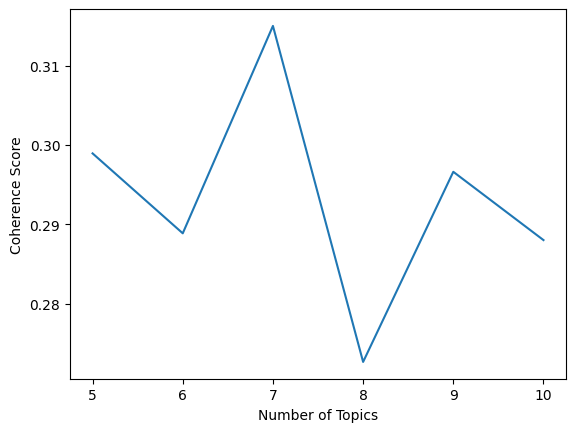

In [50]:
# plot the coherence scores
x = range(min_topics, max_topics)
plt.plot(x, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")

In [51]:
plt.savefig("coherence_plot.png")

<Figure size 640x480 with 0 Axes>

In [52]:
# display the topics
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, 
                     chunksize=2000, alpha='auto', eta='auto', 
                     iterations=400)
topics = lda_model.show_topics(num_topics=10, formatted=False)
for topic in topics:
    print(f"set {topic[0]}")
    for word, weight in topic[1]:
        print(f"{word}: {weight}")
    print()

set 0
thing: 0.03428966924548149
know: 0.027325475588440895
said: 0.02732434868812561
something: 0.027323752641677856
doesnt: 0.027321888133883476
opportunity: 0.01431367639452219
picking: 0.01431343611329794
In: 0.01431319024413824
really: 0.014313115738332272
final: 0.014313080348074436

set 1
want: 0.07523620873689651
You: 0.06048227474093437
next: 0.030980560928583145
else: 0.030980436131358147
gift: 0.016228923574090004
hour: 0.01622888073325157
In: 0.016228746622800827
emotionally: 0.016228187829256058
stretch: 0.016228027641773224
like: 0.016227999702095985

set 2
track: 0.03369718790054321
want: 0.033696677535772324
dont: 0.03369498252868652
nothing: 0.03369439020752907
driving: 0.017652073875069618
see: 0.017651904374361038
really: 0.017651544883847237
day: 0.017650820314884186
world: 0.01765071041882038
So: 0.017650624737143517

set 3
This: 0.04441703110933304
like: 0.030088644474744797
people: 0.01576228067278862
straight: 0.015761949121952057
fastest: 0.015761598944664
Your

In [55]:
# Visualization - word cloud

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [57]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(preprocessed_text)


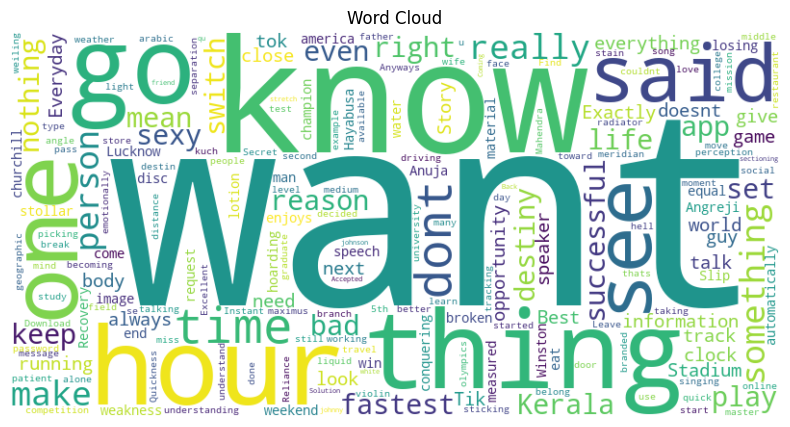

In [58]:
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.show()